In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py
import os
sys.path.append(r'C:\Users\dandr\Documents\DataMining')

from FinalProject.utils.files import get_subfiles

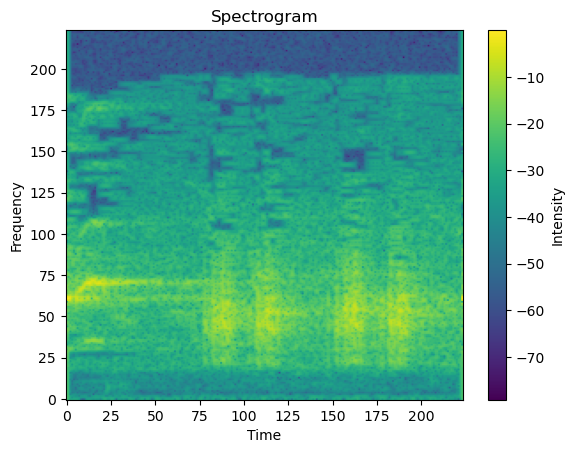

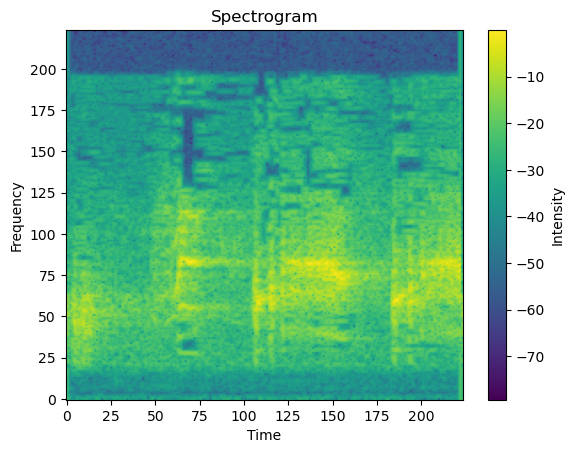

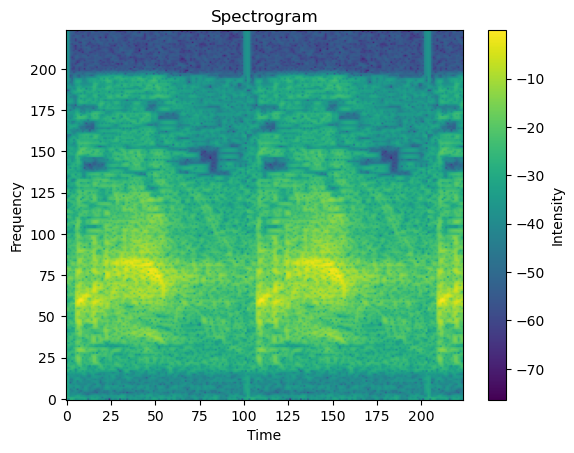

In [6]:
# Plot a spectogram in its original version .npy
project_dir: str = r'C:\Users\dandr\Documents\DataMining\FinalProject\spectrograms\Acrocephalus arundinaceus\test'

for file, file_path in get_subfiles(project_dir):
    if file.endswith(".npy"):
        # Load npy file
        spectrogram_data = np.load(file_path)

        # Display the spectrogram
        plt.imshow(spectrogram_data, cmap='viridis', origin='lower', aspect='auto')
        plt.colorbar(label='Intensity')
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        plt.title('Spectrogram')
        plt.show()

In [10]:
# Conversion of .npy to .h5 and save them in a new folder 'spects_h5'
main_folder = r'C:\Users\dandr\Documents\DataMining\FinalProject\spectrograms'
output_folder = r'C:\Users\dandr\Documents\DataMining\FinalProject\spects_h5'

def convert_npy_to_hdf5(input_folder, output_folder):
    for item in os.listdir(input_folder):
        item_path = os.path.join(input_folder, item)
        output_path = os.path.join(output_folder, item)

        if os.path.isdir(item_path):
            # If it's a subfolder, create a corresponding folder in the output directory
            os.makedirs(output_path, exist_ok=True)
            convert_npy_to_hdf5(item_path, output_path)
        elif item.endswith('.npy'):
            # If it's an .npy file, load and save it in the HDF5 file
            data = np.load(item_path)
            with h5py.File(os.path.join(output_folder, item.replace('.npy', '.h5')), 'w') as hf:
                hf.create_dataset(item.replace('.npy', ''), data=data)

# Create an HDF5 file in the output folder
convert_npy_to_hdf5(main_folder, output_folder)


<HDF5 file "XC106948_1.h5" (mode r)>


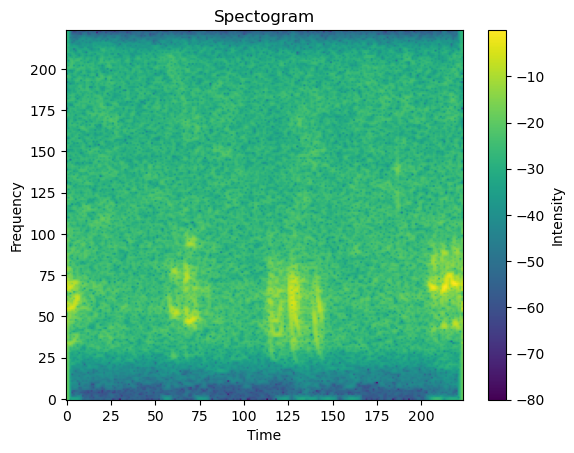

In [19]:
# Specify the path to your HDF5 file
hdf5_file_path = r"C:\Users\dandr\Documents\DataMining\FinalProject\spects_h5\Acrocephalus melanopogon\XC106948_1.h5"

# Open the HDF5 file in read-only mode
with h5py.File(hdf5_file_path, 'r') as hf:
    print(hf)
    # Access a specific dataset
    dataset_name = 'XC106948_1'

    if dataset_name in hf:
        dataset = hf[dataset_name]

        # Get the data as a NumPy array
        data_as_numpy = np.array(dataset)
        # print(data_as_numpy)

        # Plot the data
        plt.imshow(data_as_numpy, cmap='viridis', origin='lower', aspect='auto')
        plt.colorbar(label='Intensity')
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        plt.title('Spectogram')
        plt.show()